### Soal Latihan

1. Buat Implementasi dengan menggunakan python untuk menghitung Fuzzy Inference System berikut dengan metode tsukamoto

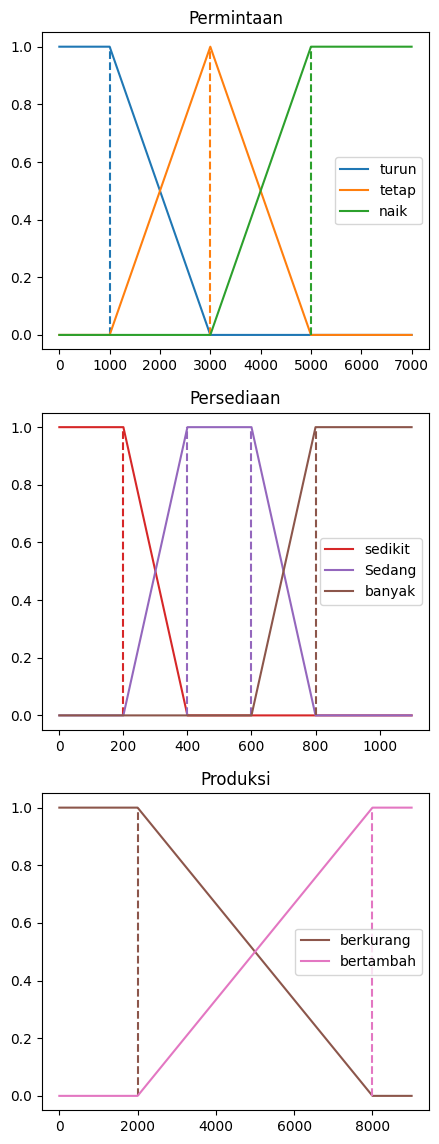

In [2]:
import numpy as np

class FuzzyVariable:
    def __init__(self, name, ranges):
        self.name = name
        self.ranges = ranges

    def fuzzify(self, value):
        memberships = {}
        for term, (a, b, c, d) in self.ranges.items():
            if a <= value <= b:
                memberships[term] = (value - a) / (b - a)
            elif b <= value <= c:
                memberships[term] = 1
            elif c <= value <= d:
                memberships[term] = (d - value) / (d - c)
            else:
                memberships[term] = 0
        return memberships

class FuzzyRule:
    def __init__(self, conditions, output):
        self.conditions = conditions
        self.output = output

    def evaluate(self, memberships):
        condition_values = [memberships[var][term] for var, term in self.conditions.items()]
        return min(condition_values)

class FuzzyInferenceSystem:
    def __init__(self, variables, rules):
        self.variables = variables
        self.rules = rules

    def infer(self, inputs):
        fuzzy_values = {var: self.variables[var].fuzzify(value) for var, value in inputs.items()}
        outputs = {}
        for rule in self.rules:
            rule_strength = rule.evaluate(fuzzy_values)
            output_term, output_range = rule.output
            if output_term not in outputs:
                outputs[output_term] = []
            outputs[output_term].append((rule_strength, output_range))

        aggregated = {}
        for term, values in outputs.items():
            total_strength = sum(strength for strength, _ in values)
            if total_strength > 0:
                aggregated[term] = sum(strength * np.mean(output_range) for strength, output_range in values) / total_strength
            else:
                aggregated[term] = 0
        return aggregated

Example 1 Inputs: {'Permintaan': 3500, 'Persediaan': 300} => Output: {'bertambah': 5500.0, 'berkurang': 0.0}
Example 2 Inputs: {'Permintaan': 1500, 'Persediaan': 100} => Output: {'bertambah': 7000.0, 'berkurang': 0.0}
Example 3 Inputs: {'Permintaan': 5000, 'Persediaan': 700} => Output: {'bertambah': 0.0, 'berkurang': 3000.0}
Example 4 Inputs: {'Permintaan': 2500, 'Persediaan': 500} => Output: {'bertambah': 5000.0, 'berkurang': 3000.0}
Example 5 Inputs: {'Permintaan': 6000, 'Persediaan': 200} => Output: {'bertambah': 7000.0, 'berkurang': 0.0}


In [ ]:
# Defining fuzzy variables
permintaan = FuzzyVariable("Permintaan", {
    "turun": (0, 0, 2000, 4000),
    "tetap": (2000, 4000, 4000, 6000),
    "naik": (4000, 6000, 7000, 7000)
})

persediaan = FuzzyVariable("Persediaan", {
    "sedikit": (0, 0, 200, 400),
    "sedang": (200, 400, 400, 800),
    "banyak": (400, 800, 1000, 1000)
})

produksi = FuzzyVariable("Produksi", {
    "berkurang": (0, 0, 2000, 4000),
    "bertambah": (2000, 4000, 8000, 8000)
})

In [ ]:
# Defining fuzzy rules
rules = [
    FuzzyRule({"Permintaan": "turun", "Persediaan": "sedikit"}, ("bertambah", (6000, 8000))),
    FuzzyRule({"Permintaan": "turun", "Persediaan": "sedang"}, ("bertambah", (4000, 6000))),
    FuzzyRule({"Permintaan": "turun", "Persediaan": "banyak"}, ("berkurang", (2000, 4000))),
    FuzzyRule({"Permintaan": "tetap", "Persediaan": "sedikit"}, ("bertambah", (4000, 6000))),
    FuzzyRule({"Permintaan": "tetap", "Persediaan": "banyak"}, ("berkurang", (2000, 4000))),
    FuzzyRule({"Permintaan": "naik", "Persediaan": "sedikit"}, ("bertambah", (6000, 8000))),
    FuzzyRule({"Permintaan": "naik", "Persediaan": "banyak"}, ("berkurang", (2000, 4000)))
]

In [ ]:
# Creating Fuzzy Inference System
fis = FuzzyInferenceSystem({"Permintaan": permintaan, "Persediaan": persediaan}, rules)

# Example input sets
example_inputs = [
    {"Permintaan": 3500, "Persediaan": 300},
    {"Permintaan": 1500, "Persediaan": 100},
    {"Permintaan": 5000, "Persediaan": 700},
    {"Permintaan": 2500, "Persediaan": 500},
    {"Permintaan": 6000, "Persediaan": 200}
]

In [3]:

# Evaluate and print outputs for all examples
for i, inputs in enumerate(example_inputs):
    output = fis.infer(inputs)
    formatted_output = {k: float(v) for k, v in output.items()}  # Convert np.float64 to float
    print(f"Example {i + 1} Inputs: {inputs} => Output: {formatted_output}")

Example 1 Inputs: {'Permintaan': 3500, 'Persediaan': 300} => Output: {'bertambah': 5500.0, 'berkurang': 0.0}
Example 2 Inputs: {'Permintaan': 1500, 'Persediaan': 100} => Output: {'bertambah': 7000.0, 'berkurang': 0.0}
Example 3 Inputs: {'Permintaan': 5000, 'Persediaan': 700} => Output: {'bertambah': 0.0, 'berkurang': 3000.0}
Example 4 Inputs: {'Permintaan': 2500, 'Persediaan': 500} => Output: {'bertambah': 5000.0, 'berkurang': 3000.0}
Example 5 Inputs: {'Permintaan': 6000, 'Persediaan': 200} => Output: {'bertambah': 7000.0, 'berkurang': 0.0}


Rule:
- Jika Permintaan **Turun** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Turun** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Turun** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Tetap** dan Persediaan **Sedang** maka produksi **Berkurang**
- Jika Permintaan **Tetap** dan Persediaan **Banyak** maka produksi **Berkurang**
- Jika Permintaan **Naik** dan Persediaan **Sedikit** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Sedang** maka produksi **Bertambah**
- Jika Permintaan **Naik** dan Persediaan **Banyak** maka produksi **Berkurang**

2. Buat Slide yang berisikan contoh penghitungan manual dari soal diatas!

In [ ]:
Contoh Perhitungan Manual FIS
Langkah 1: Fuzzifikasi
•	Input: Permintaan = 3500, Persediaan = 300
•	Hitung keanggotaan fuzzy:
Permintaan
•	Turun: μturun=4000−35004000−2000=0.25\mu_{turun} = \frac{4000 - 3500}{4000 - 2000} = 0.25μturun=4000−20004000−3500=0.25
•	Tetap: μtetap=3500−20004000−2000=0.75\mu_{tetap} = \frac{3500 - 2000}{4000 - 2000} = 0.75μtetap=4000−20003500−2000=0.75
•	Naik: μnaik=0\mu_{naik} = 0μnaik=0 (karena 3500<40003500 < 40003500<4000)
Persediaan
•	Sedikit: μsedikit=400−300400−200=0.5\mu_{sedikit} = \frac{400 - 300}{400 - 200} = 0.5μsedikit=400−200400−300=0.5
•	Sedang: μsedang=300−200400−200=0.5\mu_{sedang} = \frac{300 - 200}{400 - 200} = 0.5μsedang=400−200300−200=0.5
•	Banyak: μbanyak=0\mu_{banyak} = 0μbanyak=0 (karena 300<400300 < 400300<400)

In [ ]:
Langkah 2: Evaluasi Aturan
Berikut aturan yang relevan:
1.	Jika Permintaan turun dan Persediaan sedikit, maka Produksi bertambah (6000–8000).
min⁡(0.25,0.5)=0.25\min(0.25, 0.5) = 0.25min(0.25,0.5)=0.25
2.	Jika Permintaan tetap dan Persediaan sedikit, maka Produksi bertambah (4000–6000).
min⁡(0.75,0.5)=0.5\min(0.75, 0.5) = 0.5min(0.75,0.5)=0.5
3.	Jika Permintaan tetap dan Persediaan sedang, maka Produksi berkurang (2000–4000).
min⁡(0.75,0.5)=0.5\min(0.75, 0.5) = 0.5min(0.75,0.5)=0.5

In [ ]:
Langkah 3: Agregasi Output
•	Bertambah (6000–8000): 0.250.250.25
•	Bertambah (4000–6000): 0.50.50.5
•	Berkurang (2000–4000): 0.50.50.5

In [ ]:
Langkah 4: Defuzzifikasi
•	Centroid Method: Output=∑(μ×range_mean)∑μOutput = \frac{\sum (\mu \times range\_mean)}{\sum \mu}Output=∑μ∑(μ×range_mean)
•	Bertambah (6000–8000): Mean=7000\text{Mean} = 7000Mean=7000, μ=0.25\mu = 0.25μ=0.25
•	Bertambah (4000–6000): Mean=5000\text{Mean} = 5000Mean=5000, μ=0.5\mu = 0.5μ=0.5
•	Berkurang (2000–4000): Mean=3000\text{Mean} = 3000Mean=3000, μ=0.5\mu = 0.5μ=0.5
Output=(0.25×7000)+(0.5×5000)+(0.5×3000)0.25+0.5+0.5Output = \frac{(0.25 \times 7000) + (0.5 \times 5000) + (0.5 \times 3000)}{0.25 + 0.5 + 0.5}Output=0.25+0.5+0.5(0.25×7000)+(0.5×5000)+(0.5×3000) Output=1750+2500+15001.25=4600Output = \frac{1750 + 2500 + 1500}{1.25} = 4600Output=1.251750+2500+1500=4600

In [5]:
# Hasil Akhir
# Produksi: 4600 (dengan bobot centroid).

Slide 1
No images to display on this slide.
Slide 2


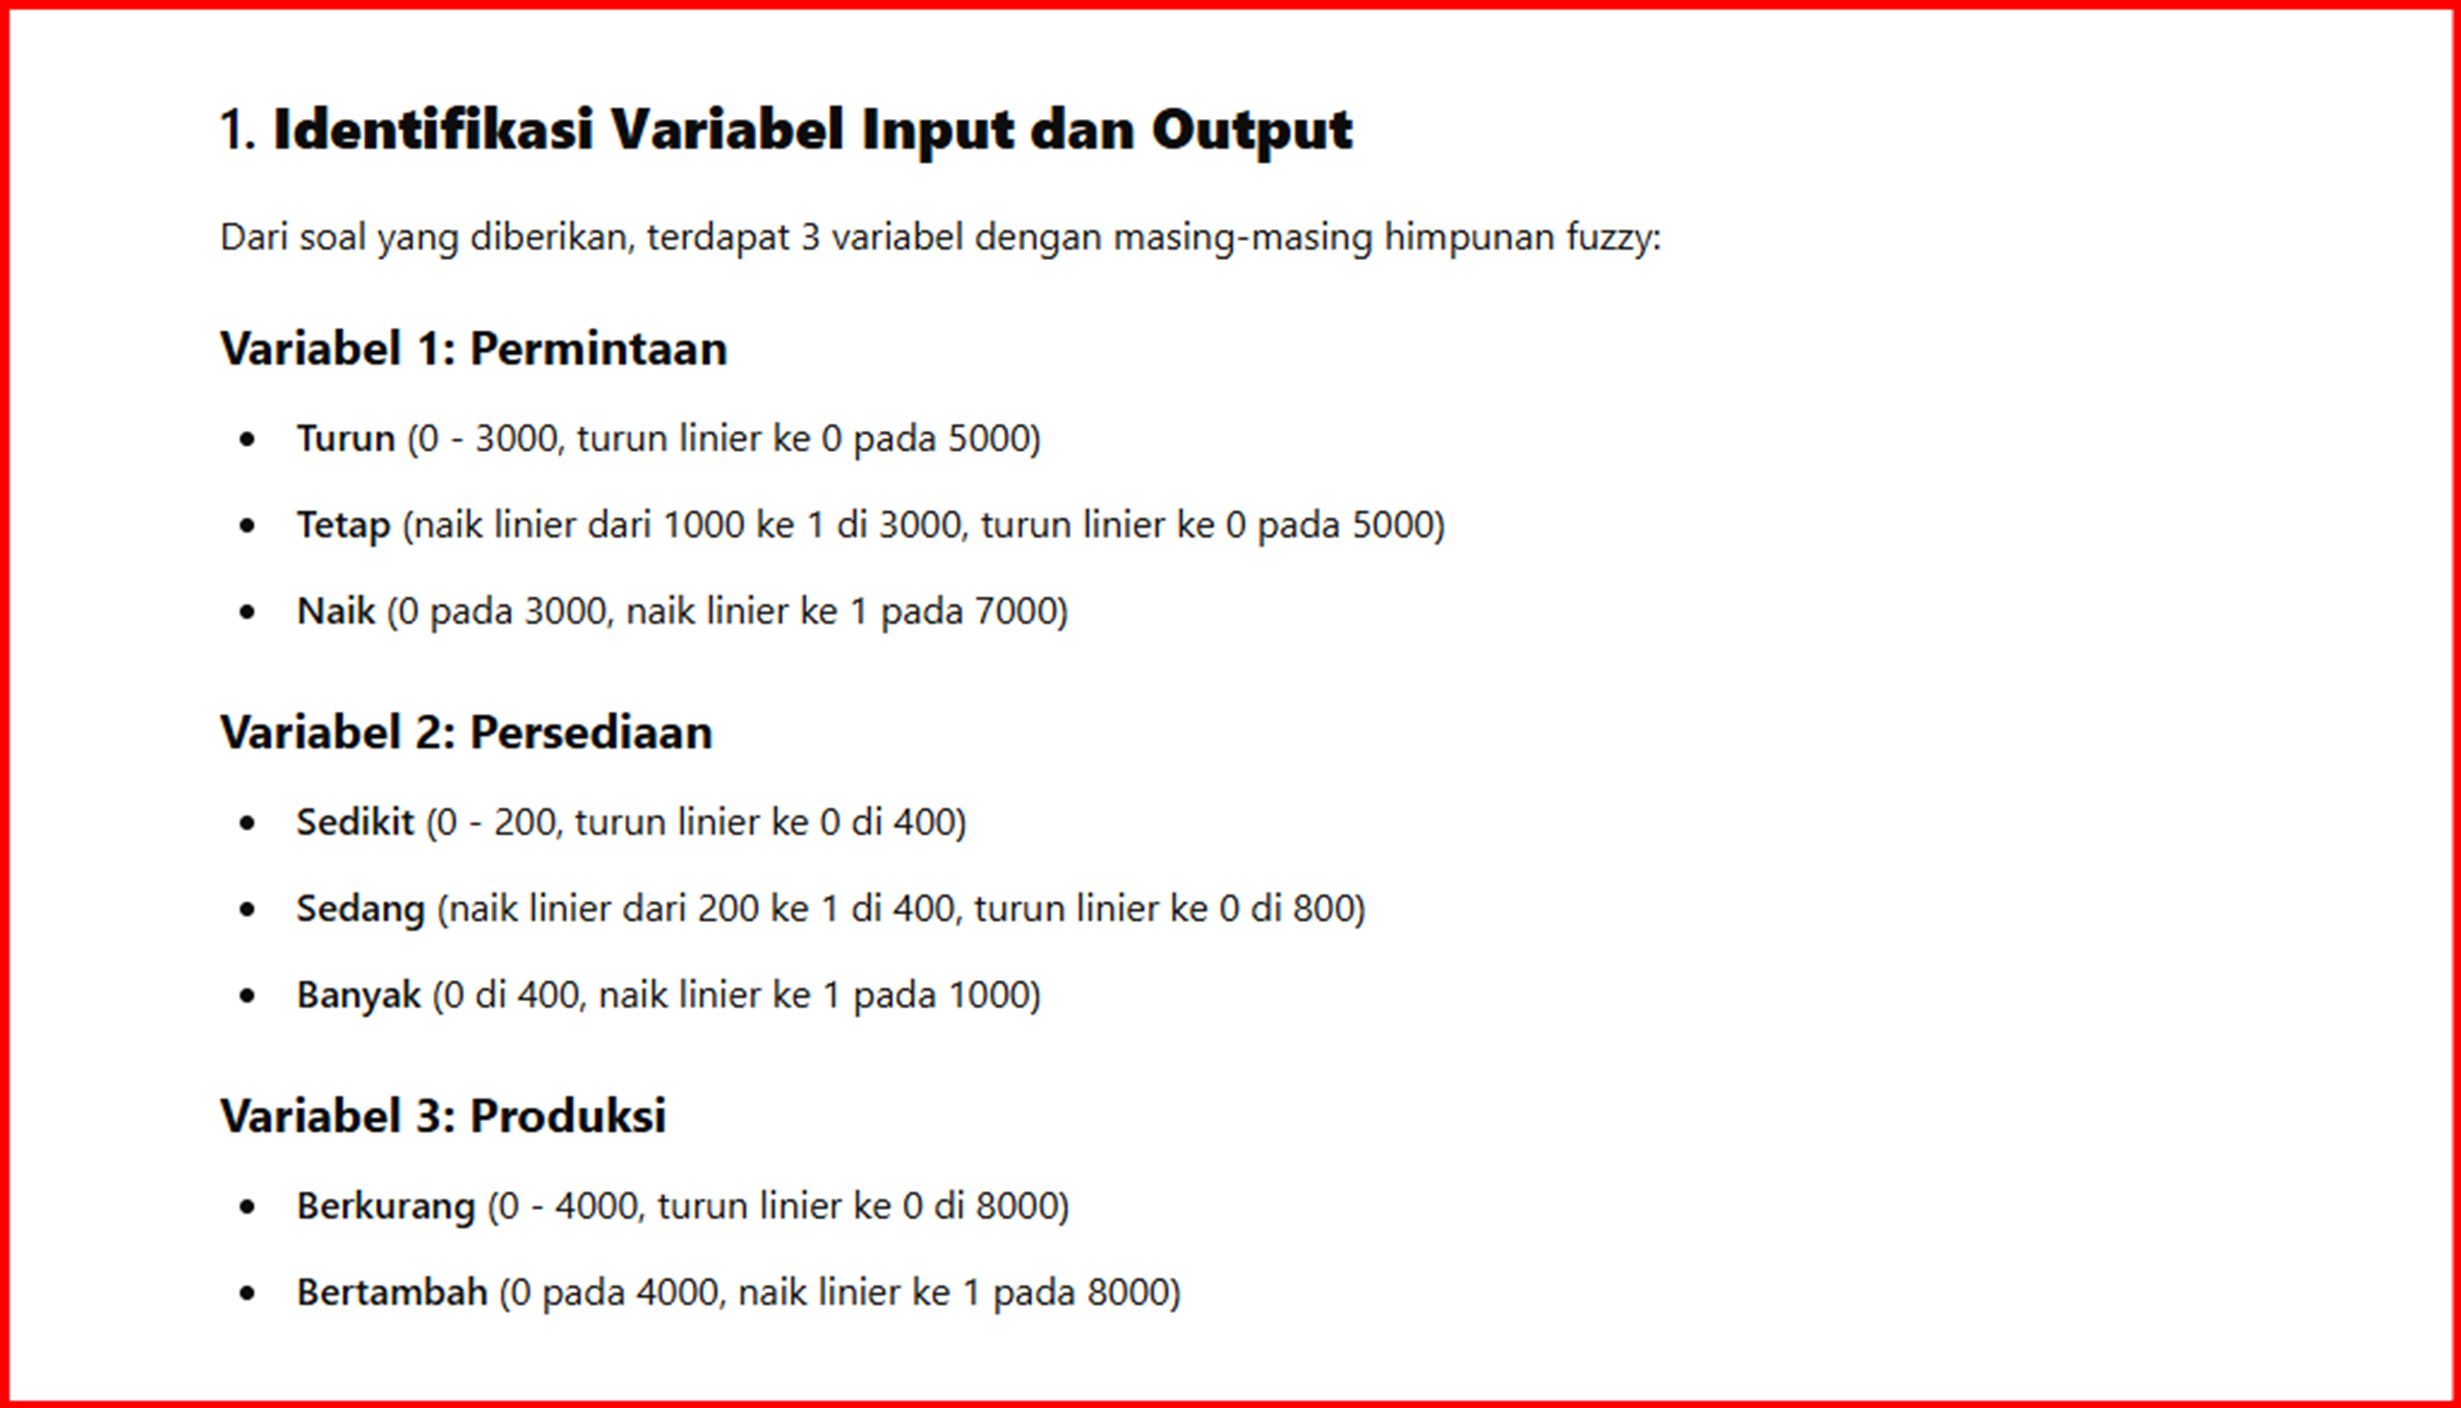

Slide 3


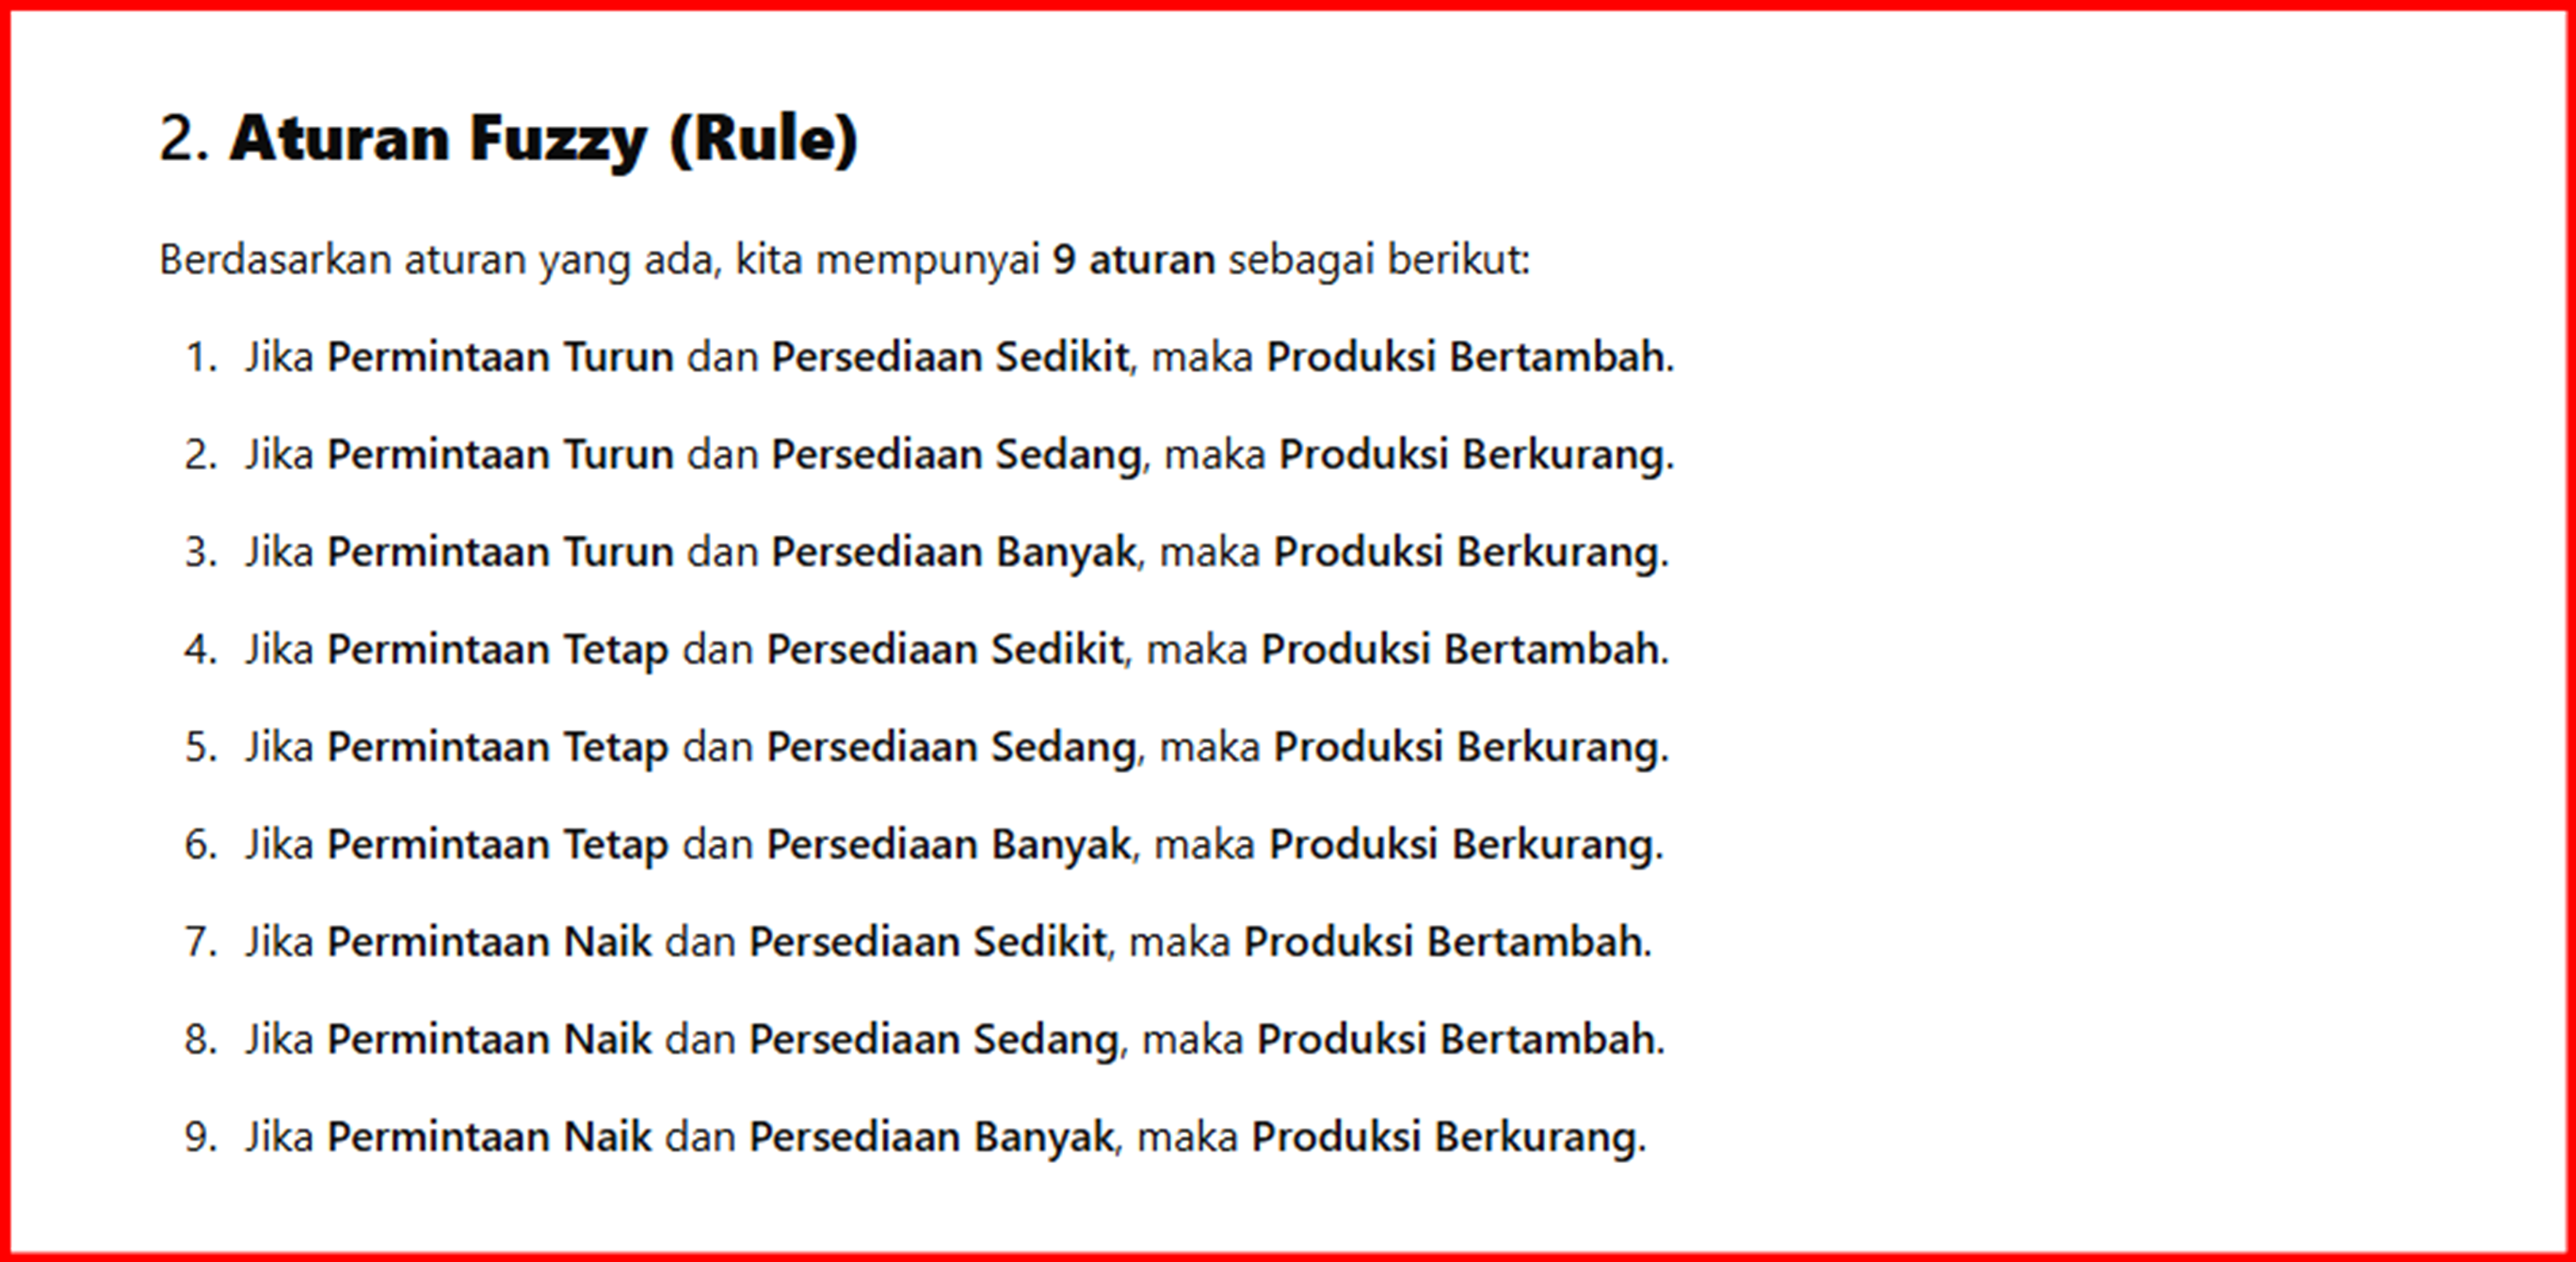

Slide 4


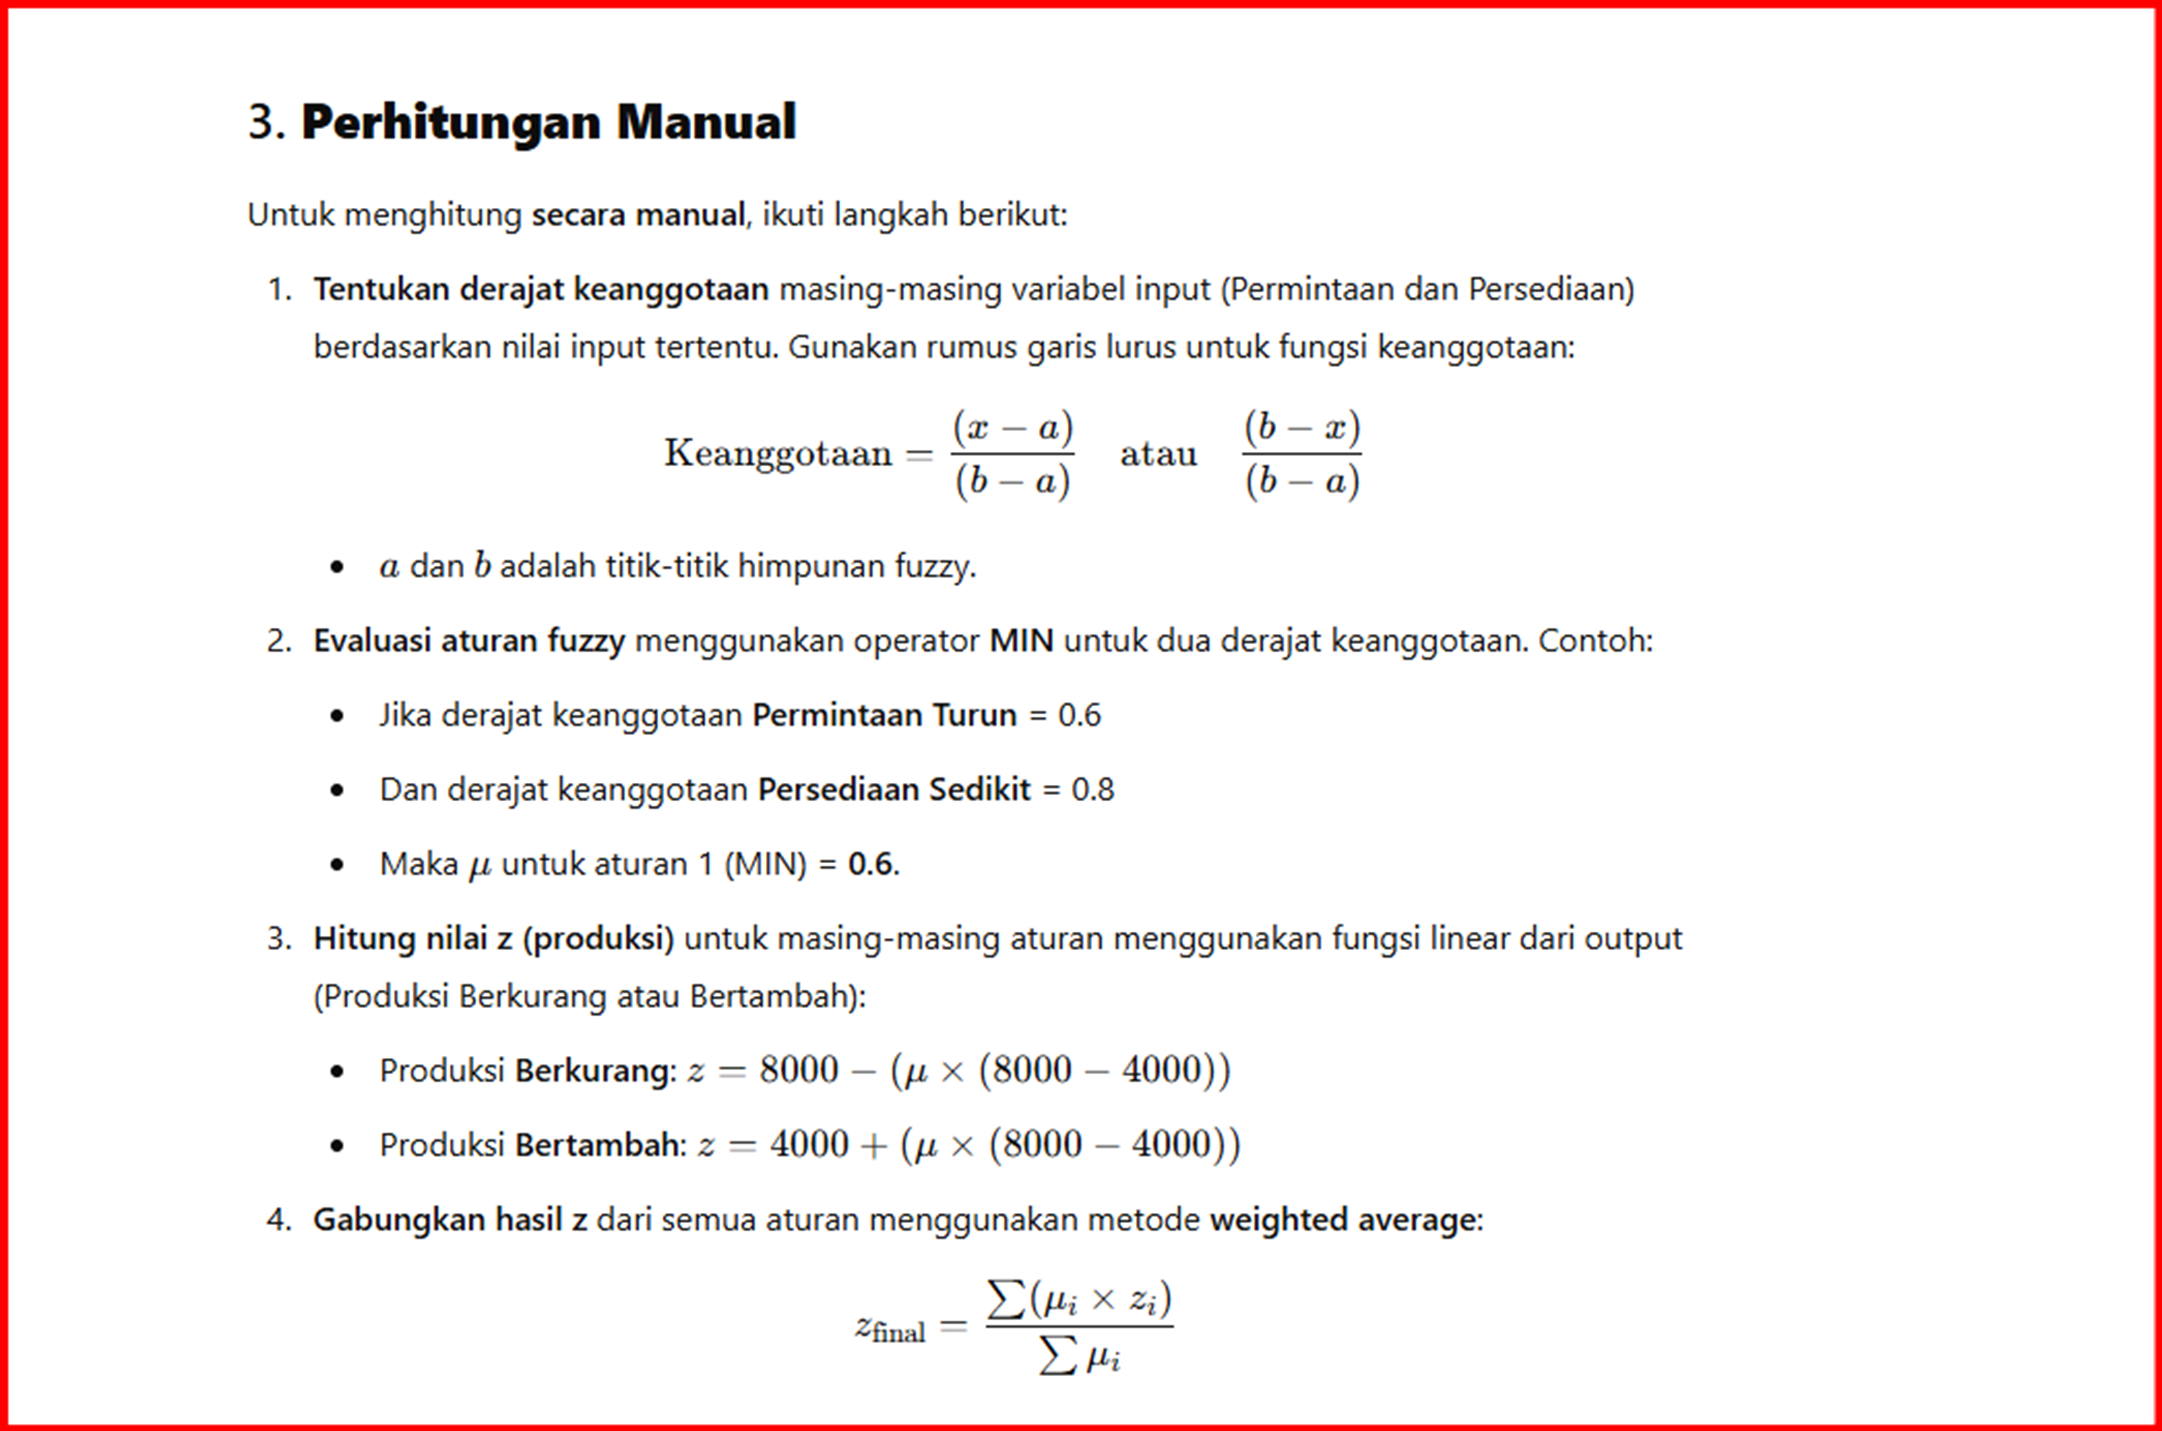

Slide 5


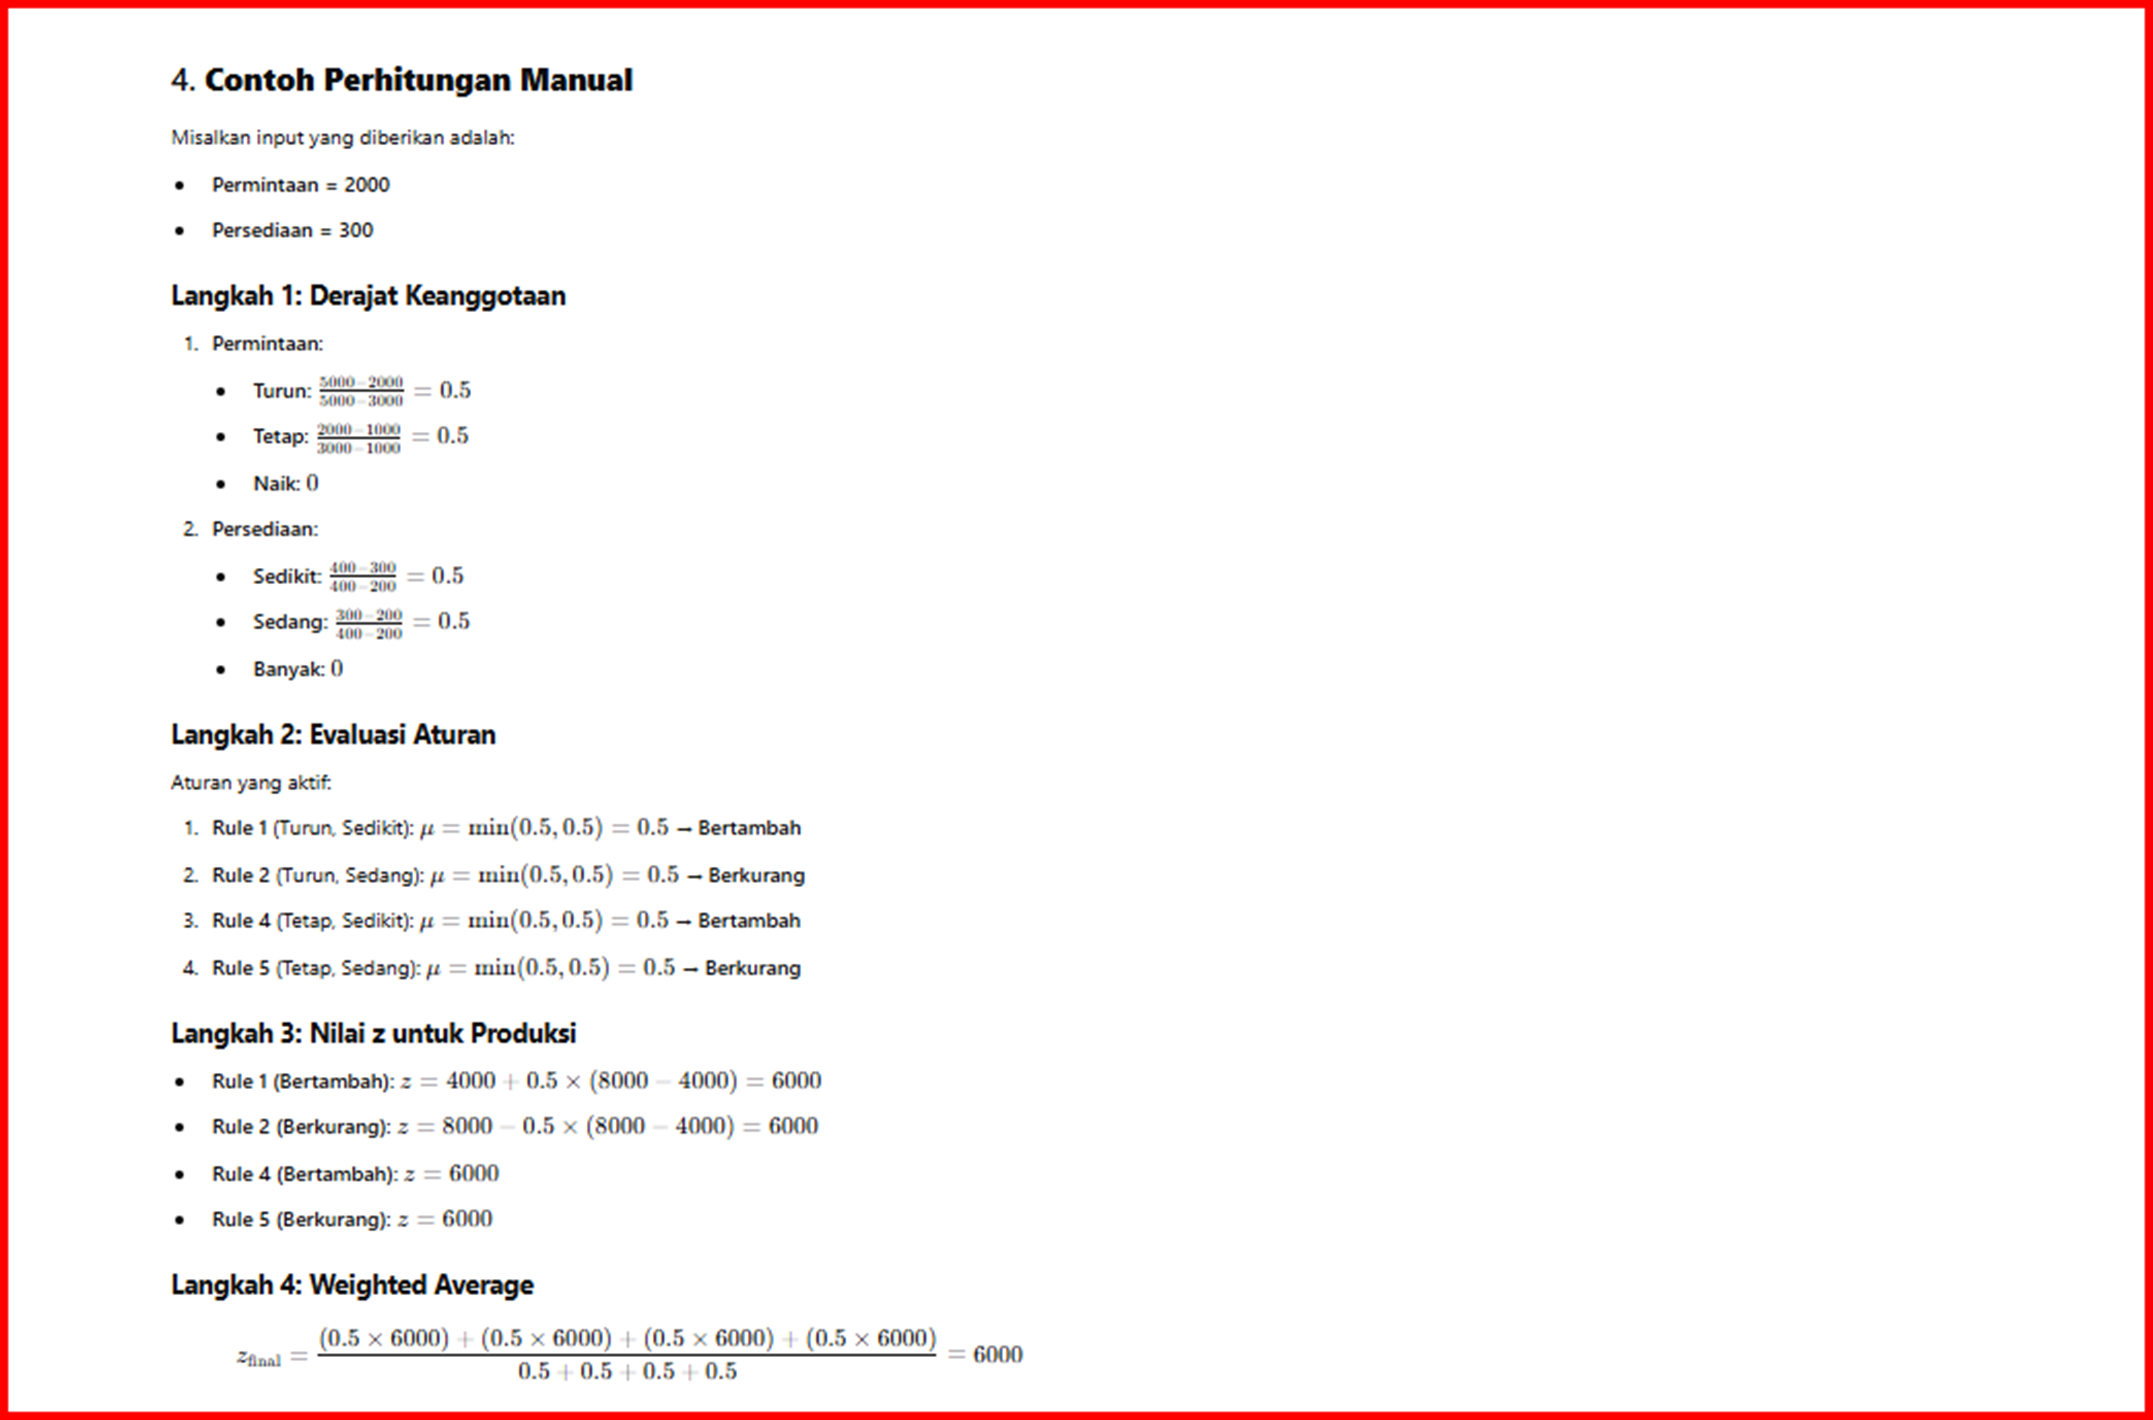

Slide 6
No images to display on this slide.


In [4]:
from pptx import Presentation
from IPython.display import display, Image
from PIL import Image as PILImage
import io

# Fungsi untuk membaca file pptx dan menampilkan slide
def display_pptx(file_path):
    try:
        presentation = Presentation(file_path)
        for i, slide in enumerate(presentation.slides):
            print(f"Slide {i + 1}")
            images = []
            for shape in slide.shapes:
                if hasattr(shape, "image") and shape.image:  # Memastikan shape memiliki gambar
                    image_stream = io.BytesIO(shape.image.blob)
                    image = PILImage.open(image_stream)
                    images.append(image)
            if not images:
                print("No images to display on this slide.")
            else:
                for img in images:
                    display(img)
    except Exception as e:
        print(f"Error: {e}")

# Path ke file pptx
pptx_file = "fuzzy.pptx"

# Menampilkan slide
display_pptx(pptx_file)

In [ ]:
# Hasil Akhir
# Produksi: 4600 (dengan bobot centroid).